# 1. Вводная часть
### 1.1. Leave-one-out (LOO) Validation
Leave-one-out — это особый случай k-fold кросс-валидации, где параметр k (количество фолдов) равен количеству объектов в dataset. Это означает, что модель обучается n раз, и каждый раз в качестве тестовой выборки используется ровно один объект, а все остальные (n-1 объект) образуют обучающую выборку.
##### Преимущества:
- Этот метод очень полезен, когда мало данных, и когда необходимо использовать максимальное количество данных для обучения модели
##### Недостатки:
- На каждой итерации методу для валидации требуется всего один фолд, однако итераций будет сколько строк в данных, поэтому метод неприменим для больших datasets
- Не подходит для данных, где есть группы или временные промежутки (возможна утечка данных)

### 1.2. Как работают Grid Search, Randomized Grid Search, и Bayesian optimization?
##### - Grid Search
Алгоритм: вручную задается сетка (grid) гиперпараметров, как список значений для каждого настраиваемого гиперпараметра. Алгоритм перебирает все возможные комбинации этих параметров через вложенные циклы, обучает модель на каждой комбинации (обычно с помощью кросс-валидации) и выбирает ту модель, которая показала наилучший результат и запоминает лучшие парметры.
##### - Randomized Grid Search
Алгоритм: Randomized Search не перебирает все комбинации. Вместо этого он выбирает случайное подмножество всех возможных комбинаций из вашей сетки. Вы задаете не список значений, а скорее пространство параметров (например, распределение) и количество случайных комбинаций n_iter, которые нужно проверить.
##### - Bayesian optimization
Алгоритм:
1. Строит вероятностную модель, которая **приближает распределение значений** целевой функции в зависимости от уже имеющихся данных. Чаще всего строят Гауссовскую модель(Gaussian Process) 
2. Выбирает следующую точку. Функция приобретения (acquisition function) ищет баланс между исследованием (exploration, пробовать параметры в неисследованных областях **[используется высакая(ое) дисперсия/стандартное отклонение для поиска точек в неисследованных областях, чем больше стандартное отклонение или диспресия, чем дальше точка от известных нам наблюдений]**) и использованием (exploitation, пробовать параметры рядом с уже известными хорошими результатами **[исследовать те точки, где среднее значение вероятностной модели велико]**).

Формула функции приобретения (Acquisition Function):

$$
α(x) = μ(x) + β * σ(x)
$$

**Где:**
- $α(x)$ — значение функции приобретения в точке $x$. Чем оно выше, тем перспективнее считается эта точка для следующего evaluation.
- $x$ — точка в пространстве гиперпараметров (например, $x$ может быть комбинацией $learning_rate=0.01$ и $max_depth=5$).
- $μ(x)$ — среднее значение вероятностной модели (например, Гауссовского процесса) в точке $x$. Показывает, насколько *хорошей* модель *предполагает* эту точку на основе уже seen данных (**Exploitation**).
- $β$ — гиперпараметр, регулирующий баланс между exploration и exploitation. Большое $β$ уделяет больше внимания research.
- $σ(x)$ — стандартное отклонение вероятностной модели в точке $x$. Покажает *степень неопределенности* модели в этой точке (**Exploration**).
3. Новая точка добавляется к наблюдениям и вероятностная модель обновляется. Процесс повторяется итеративно. Точность подбора гиперпараметров сильно зависит от количества итераций, возвращает лучшие гиперпараметры, которые алгоритм смог найти из всех, что пробовал.

### 1.3. Классификация методов выбора признаков (Feature Selection)
##### a) Неконтролируемые методы (Unsupervised)
Методы, не использующие целевую переменную

1. Удаление неполных признаков
    - Удаление признаков с большим количеством пропущенных значений
    - Удаление признака, если % пропусков превышает заданный предел

2. Удаление признаков с высокой мультиколлинеарностью.
Мультиколлинеарность — это ситуация, когда две или более независимых признаков в модели сильно коррелируют друг с другом. Проще говоря, они несут очень похожую или даже дублирующую информацию.
    - Корреляционный анализ: удаление сильно коррелирующих признаков
    - Сохраняется один признак из высококоррелирующей группы

3. Удаление признаков с (почти) нулевой дисперсией.
Почти нулевая дисперсия означает, что признак практически не меняет своего значения от наблюдения к наблюдению. Он либо постоянный, либо почти постоянный.



##### b) Контролируемые методы (Supervised)
Методы, использующие целевую переменную

##### 1.  Оберточные методы (Wrappers)
Итеративный отбор на основе производительности модели
- Прямой отбор (Forward Selection)
    - Начинается с пустого набора признаков
    - Последовательно добавляются признаки, улучшающие модель
    - Останавливается, когда улучшение становится незначительным

- Обратный отбор (Backward Selection)
    - Начинается с полного набора признаков
    - Последовательно удаляются наименее значимые признаки
    - Останавливается, когда качество модели начинает ухудшаться

- Рекурсивное исключение признаков (RFE)
    - Рекурсивное удаление наименее важных признаков
    - Использует веса признаков из обученной модели
    - Работает до достижения заданного количества признаков

##### 2. Фильтрующие методы (Filters)
Статистические методы для оценки значимости признаков

- Корреляционные методы
    - Pearson's r: линейная корреляция для непрерывных признаков
    - Spearman's Rho: рангововая корреляция (нелинейные зависимости)
    - Kendall Tau: рангововая корреляция для небольших выборок

- Для категориальных данных
    - Chi²: тест на независимость для категориальных признаков
    - Point-biserial: корреляция между бинарной и непрерывной переменной

- Информационные методы
    - Mutual Information: оценка взаимной информации между признаками и целью
    - F-score: оценка значимости через дисперсионный анализ

##### 3. Встроенные методы (Embedded)
Методы, интегрированные в процесс обучения модели

- LASSO (L1-регуляризация)
    - Добавляет штраф за большие коэффициенты
    - Автоматически обнуляет незначимые признаки
    - Эффективен для линейных моделей

- Auto-encoder with bottleneck
    - Нейросетевое сжатие признаков
    - Боттлнек вынуждает сеть выделять главные features
    - Эффективно для нелинейных зависимостей

### 1.4. Как работают Pearson и Chi2
##### a) Корреляция Пирсона
Измеряет **линейную зависимость** между двумя непрерывными переменными.

Считает коэффициент корреляции между каждым признаком и целевой переменной. Формула показывает, насколько хорошо связь между переменными можно описать прямой линией.
Принимает значения от -1 до 1. Признаки с коэффициентом, близким к 0, считаются маловажными и могут быть удалены. Также им часто анализируют корреляцию между самими признаками, чтобы убрать сильно скоррелированные.

$$ r_{xy} = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ \sqrt{ \sum_{i=1}^{n} (x_i - \bar{x})^2 } \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2 } } $$
где:
- $n$ — количество наблюдений в выборке
- $x_i, y_i$ — значения переменных $X$ и $Y$ для $i$-го наблюдения
- $\bar{x}, \bar{y}$ — выборочные средние (среднее арифметическое) переменных $X$ и $Y$

Интерпретация коэффициента корреляции Пирсона:
- 1: Полная прямая линейная зависимость (рост одного – рост другого).
- -1: Полная обратная линейная зависимость (рост одного – падение другого).
- 0: Линейная зависимость отсутствует.
##### b) Chi-Squared Test (Критерий хи-квадрат)
Измеряет зависимость между двумя категориальными переменными. Проверяет гипотезу о том, что переменные независимы. Признаки с высокой статистикой хи-квадрат (и низким p-value) отбираются как наиболее полезные для предсказания категориальной цели.

Сравнивает распределение признака в разных классах целевой переменной. Если распределение признака значительно отличается для разных классов, то признак и целевая переменная зависимы, и признак важен.

Критерий хи-квадрат сравнивает два распределения:
- Наблюдаемые частоты (O — Observed): Реальные данные, которые вы увидели в своей таблице.
- Ожидаемые частоты (E — Expected): Теоретические частоты, которые мы бы получили, если бы эти два признака были полностью независимы друг от друга.

Чем больше расхождение между тем, что мы наблюдаем (O), и тем, что ожидаем при условии независимости (E), тем больше значение статистики χ² и тем больше оснований считать, что признаки зависимы.Чем больше значение статистики, тем больше разница между наблюдаемыми и ожидаемыми (при условии независимости) частотами, тем важнее признак, тем больше зависимость.

### 1.5. Как работает Lasso
Lasso добавляет к функции потерь модели (например, линейной регрессии) штрафной член, равный сумме абсолютных значений коэффициентов при признаках (L1-норма). 

Как происходит отбор:
- Параметр λ (lambda) контролирует силу штрафа. Чем больше λ, тем сильнее штраф за большие коэффициенты.
- Чтобы минимизировать общую функцию потерь, модели "выгоднее" не просто уменьшить значения коэффициентов, а обнулить коэффициенты у наименее важных признаков.
- Таким образом, после обучения веса (коэффициенты) у некоторых признаков становятся равными нулю. Эти признаки можно удалить из датасета.

Lasso автоматически производит отбор признаков, обнуляя веса бесполезных переменных. Это его ключевое отличие от Ridge-регуляризации (L2), которая коэффициенты только уменьшает, но не обнуляет.

### 1.6. Важность признаков через перестановки (Permutation Importance)
Этот метод работает с любой обученной моделью.

Основная идея: Насколько упадет качество модели, если мы случайным образом перемешаем значения одного признака, разорвав тем самым его связь с целевой переменной?

Алгоритм:
- Обучаем модель и измеряем ее базовое качество (например, accuracy или R2) на валидационной выборке.
- Для каждого признака:
    - Перемешиваем значения этого признака в валидационной выборке.
    - Пропускаем эти данные через обученную модель и получаем новое качество.
    - Важность признака = Базовое_качество - Новое_качество.
- Если после перемешивания признака качество модели сильно упало — признак был очень важен. Если качество почти не изменилось — признак несущественен.

### 1.7. SHAP (SHapley Additive exPlanations)
SHAP — это фреймворк для интерпретируемости моделей машинного обучения. Он объясняет каждое отдельное предсказание модели.

Фреймворк заимствует концепцию Вектора Шепли из теории игр. Цель — справедливо распределить "вклад" в итоговый прогноз модели между всеми признаками.

Алгоритм:
- Рассматривается конкретное наблюдение
- Модель запускается много раз с разными комбинациями признаков (включая и исключая их)
- SHAP-значение для каждого признака — это его средний вклад во все возможные комбинации признаков
- Сумма SHAP-значений всех признаков равна разнице между прогнозом модели для данного наблюдения и средним прогнозом по всему dataset.

Определяет:
- Какие признаки в среднем самые важные для модели
- Почему модель сделала именно такой прогноз для конкретного сэмпла

# 2. Введение. Предварительная обработка данных

### Импорт необходимых библиотек

In [80]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import random
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import MultiLabelBinarizer


### Загрузка данных
1. #### Обучающая выборка

In [81]:
train_df = pd.read_json('data/train.json')
train_df = train_df[['created', 'bathrooms', 'bedrooms', 'price', 'interest_level', 'features']]
train_df['created'] = pd.to_datetime(train_df['created'])
train_df['year'] = train_df['created'].dt.year
train_df = train_df.drop(columns=['created'])
train_df.head(10)

,bathrooms,bedrooms,price,interest_level,features,year
4,1.0,1,2400,medium,"[Dining Room, Pre-War, Laundry in Building, Di...",2016
6,1.0,2,3800,low,"[Doorman, Elevator, Laundry in Building, Dishw...",2016
9,1.0,2,3495,medium,"[Doorman, Elevator, Laundry in Building, Laund...",2016
10,1.5,3,3000,medium,[],2016
15,1.0,0,2795,low,"[Doorman, Elevator, Fitness Center, Laundry in...",2016
16,1.0,3,7200,low,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",2016
18,2.0,3,6000,low,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",2016
19,1.0,0,1945,high,"[Elevator, Laundry in Building, Dishwasher, Ha...",2016
23,0.0,1,2435,low,[Hardwood Floors],2016
32,3.0,3,6850,low,"[Cats Allowed, Dogs Allowed]",2016


- #### Преобразуем столбец 'interest level'

In [82]:
encoding_dict = {'low' : 0, 'medium' : 1, 'high' : 2}
data = pd.Series(train_df['interest_level'])
encoded_data = data.map(encoding_dict)
train_df['interest_level'] = encoded_data
train_df.head(10)

,bathrooms,bedrooms,price,interest_level,features,year
4,1.0,1,2400,1,"[Dining Room, Pre-War, Laundry in Building, Di...",2016
6,1.0,2,3800,0,"[Doorman, Elevator, Laundry in Building, Dishw...",2016
9,1.0,2,3495,1,"[Doorman, Elevator, Laundry in Building, Laund...",2016
10,1.5,3,3000,1,[],2016
15,1.0,0,2795,0,"[Doorman, Elevator, Fitness Center, Laundry in...",2016
16,1.0,3,7200,0,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",2016
18,2.0,3,6000,0,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",2016
19,1.0,0,1945,2,"[Elevator, Laundry in Building, Dishwasher, Ha...",2016
23,0.0,1,2435,0,[Hardwood Floors],2016
32,3.0,3,6850,0,"[Cats Allowed, Dogs Allowed]",2016


- #### Заметим, что пропусков в признаках обучающей выборки нет

In [83]:
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       49352 non-null  float64
 1   bedrooms        49352 non-null  int64  
 2   price           49352 non-null  int64  
 3   interest_level  49352 non-null  int64  
 4   features        49352 non-null  object 
 5   year            49352 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 2.4+ MB


bathrooms         0
bedrooms          0
price             0
interest_level    0
features          0
year              0
dtype: int64

#### 2. Тестовая выборка

In [84]:
test_df = pd.read_json('data/test.json')
test_df = test_df[['bathrooms', 'bedrooms', 'price', 'features']]
test_df.head(10)

,bathrooms,bedrooms,price,features
0,1.0,1,2950,"[Elevator, Laundry in Building, Laundry in Uni..."
1,1.0,2,2850,"[Pre-War, Dogs Allowed, Cats Allowed]"
2,1.0,0,2295,"[Pre-War, Dogs Allowed, Cats Allowed]"
3,1.0,2,2900,"[Hardwood Floors, Dogs Allowed, Cats Allowed]"
5,1.0,1,3254,"[Roof Deck, Doorman, Elevator, Fitness Center,..."
7,2.0,2,4990,"[Cats Allowed, Dogs Allowed, No Fee, Doorman, ..."
8,3.5,4,20000,"[Elevator, Cats Allowed, Dogs Allowed]"
11,1.0,0,2150,"[Doorman, Elevator, Laundry in Building, Hardw..."
12,2.0,4,6500,[No Fee]
13,1.0,1,3365,"[Fitness Center, Cats Allowed, Dogs Allowed]"


- #### Заметим, что в тестовой выборке нет признака 'interest level'

### Добавление новых признаков

- #### Посмотрим столбец features. Он состоит из списков признаков

In [85]:
train_df['features']

4         [Dining Room, Pre-War, Laundry in Building, Di...
6         [Doorman, Elevator, Laundry in Building, Dishw...
9         [Doorman, Elevator, Laundry in Building, Laund...
10                                                       []
15        [Doorman, Elevator, Fitness Center, Laundry in...
                                ...                        
124000              [Elevator, Dishwasher, Hardwood Floors]
124002    [Common Outdoor Space, Cats Allowed, Dogs Allo...
124004    [Dining Room, Elevator, Pre-War, Laundry in Bu...
124008    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
124009    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 49352, dtype: object

- #### Удалим лишние символы ([,], ', ", space)

In [86]:
train_df['features'] = train_df['features'].map(lambda x: [''.join([re.sub(r'[^a-zA-Z-]', '', str(word)).title() for word in element.split()]) for element in x])
test_df['features'] = test_df['features'].map(lambda x: [''.join([re.sub(r'[^a-zA-Z-]', '', str(word)).title() for word in element.split()]) for element in x])
train_df['features']

4         [DiningRoom, Pre-War, LaundryInBuilding, Dishw...
6         [Doorman, Elevator, LaundryInBuilding, Dishwas...
9         [Doorman, Elevator, LaundryInBuilding, Laundry...
10                                                       []
15        [Doorman, Elevator, FitnessCenter, LaundryInBu...
                                ...                        
124000               [Elevator, Dishwasher, HardwoodFloors]
124002    [CommonOutdoorSpace, CatsAllowed, DogsAllowed,...
124004    [DiningRoom, Elevator, Pre-War, LaundryInBuild...
124008    [Pre-War, LaundryInUnit, Dishwasher, NoFee, Ou...
124009    [DiningRoom, Elevator, LaundryInBuilding, Dish...
Name: features, Length: 49352, dtype: object

- #### Создадим список уникальных новых переменных

In [87]:
new_features = [''.join([x for x in str(element).split()]) for sublist in train_df['features'] for element in sublist]
uni_features = set(new_features) 

- #### Посчитаем сколько раз встречается каждый признак

In [88]:
count_features = collections.Counter(new_features)
count_features.most_common(20)

[('Elevator', 26273),
 ('HardwoodFloors', 23559),
 ('CatsAllowed', 23540),
 ('DogsAllowed', 22035),
 ('Doorman', 20975),
 ('Dishwasher', 20806),
 ('LaundryInBuilding', 18945),
 ('NoFee', 18085),
 ('FitnessCenter', 13258),
 ('LaundryInUnit', 9435),
 ('Pre-War', 9149),
 ('RoofDeck', 6555),
 ('OutdoorSpace', 5270),
 ('DiningRoom', 5150),
 ('HighSpeedInternet', 4299),
 ('Balcony', 3058),
 ('SwimmingPool', 2730),
 ('NewConstruction', 2608),
 ('Terrace', 2313),
 ('Exclusive', 2167)]

- #### Выберем топ 20 самых встречаемыx признаков

In [89]:
top_20_names = [feature for feature, count in count_features.most_common(20)]

- #### Используя *MultiLabelBinarizer* создадим датафремы для новых 20 признаков

In [90]:
encoder = MultiLabelBinarizer(classes=top_20_names)

train_encoded = encoder.fit_transform(train_df['features']) # Для обучающей выборки
test_encoded = encoder.transform(test_df['features']) # Для тестовой выборки

d:\DataS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['', '-GrealLocation', '-HourAttendedLobby', '-HourConcierge', '-HourConciergeAndDoorman', '-HourDoorman', '-HourParkingGarageWithAnElectricVehicleChargingStation', '-MonthLeasesAllowed', '-SquareFootSunDeckFreeWifiInMarcClub', 'AFullServiceLuxuryHighrise', 'AFullServiceLuxuryResidence', 'AOne-Of-A-KindFullServiceLuxuryHighrise', 'ATrueTopLuxuryHi-Rise', 'AWideArrayOfComplimentaryFitnessClassesOfferedWeekly', 'AbsoluteValueForSizeLocation', 'AbundantClosets', 'Ac', 'AcCentral', 'AcUnits', 'AcceptsCreditCardsFeeApplies', 'AchedDoorways', 'ActFastWillNotLast', 'ActFastWontLast', 'ActualAptPhotos', 'ActualPhotos', 'AirCondition', 'AirConditioned', 'AirConditionedLaundryFacility', 'AirConditioning', 'AirConditioningUnknownType', 'Alcove', 'AlcoveStudio', 'AllBrandNewNoFeeExpansiveBrMcmansionPrivateTerraceCooksSsKitchenElevlndryBldgBlksToLTrain', 'AllCommonAreasFeatureWi-FiAccessibility'

In [91]:
train_encoded_df = pd.DataFrame(train_encoded, columns=top_20_names)
test_encoded_df = pd.DataFrame(test_encoded, columns=top_20_names)
test_encoded_df

,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,Dishwasher,LaundryInBuilding,NoFee,FitnessCenter,LaundryInUnit,Pre-War,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,NewConstruction,Terrace,Exclusive
0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74655,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
74656,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74657,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- #### Добавим новые признаки в датафреймы обучающей и тестовой выборок

In [92]:
# Сбрасываем индексы
train_df_reset = train_df.reset_index(drop=True)
test_df_reset = test_df.reset_index(drop=True)
# Объединяем датафреймы
train_df = pd.concat([train_df_reset, train_encoded_df], axis=1)
test_df = pd.concat([test_df_reset, test_encoded_df], axis=1)

train_df = train_df.drop(columns=['features'])
train_df

,bathrooms,bedrooms,price,interest_level,year,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,...,Pre-War,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,NewConstruction,Terrace,Exclusive
0,1.0,1,2400,1,2016,0,1,1,1,0,...,1,0,0,1,0,0,0,0,0,0
1,1.0,2,3800,0,2016,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2,3495,1,2016,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.5,3,3000,1,2016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,2795,0,2016,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,1.0,3,2800,0,2016,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49348,1.0,2,2395,1,2016,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
49349,1.0,1,1850,1,2016,1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,0
49350,1.0,2,4195,1,2016,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [93]:
test_df = test_df.drop(columns=['features'])
test_df

,bathrooms,bedrooms,price,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,Dishwasher,LaundryInBuilding,...,Pre-War,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,NewConstruction,Terrace,Exclusive
0,1.0,1,2950,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1.0,2,2850,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,0,2295,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,2,2900,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,3254,1,0,1,1,1,0,1,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74654,1.0,1,1700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74655,1.0,2,4195,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
74656,1.0,0,2400,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74657,2.0,2,6895,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Реализация методов разделения данных 

- Разделить данные на 2 части случайным образом с параметром test_size (доля от 0 до 1), вернуть обучающую и тестовую выборки

In [94]:
def split_train_test(data, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    n = len(data)
    indices = np.random.permutation(n)  # Перемешивание всех индексов
    test_size = int(n * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
        
    train_data = data.iloc[train_indices].reset_index(drop=True)
    test_data = data.iloc[test_indices].reset_index(drop=True)

    return train_data, test_data

- Разделить данные на 3 части случайным образом с параметрами validation_size и test_size, вернуть обучающую, валидационную и тестовую выборки

In [95]:
def split_train_val_test(data, validation_size=0.15, test_size=0.15, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    n = len(data)
    indices = np.random.permutation(n)

    test_end = int(n * test_size)
    val_end = test_end + int(n * validation_size)

    train_indices = indices[val_end:]
    val_indices = indices[test_end:val_end]
    test_indices = indices[:test_end]

    train_data = data.iloc[train_indices].reset_index(drop=True)
    val_data = data.iloc[val_indices].reset_index(drop=True)
    test_data = data.iloc[test_indices].reset_index(drop=True)
    
    return train_data, val_data, test_data


- Разделить данные на 2 части с параметром date_split, вернуть обучающую и тестовую выборки, разделенные по параметру date_split

In [96]:
def split_train_test_by_date(data, date_split, date_column):
    train_data = data[data[date_column] <= date_split].reset_index(drop=True)
    test_data = data[data[date_column] > date_split].reset_index(drop=True)
    
    return train_data, test_data

- Разделить данные на 3 части с параметрами validation_date и test_date, вернуть обучающую, валидационную и тестовую выборки, разделенные по входным параметрам

In [97]:
def split_train_val_test_by_date(data, validation_date, test_date, date_column):
    train_data = data[data[date_column] < validation_date].reset_index(drop=True)
    val_data = data[(data[date_column] >= validation_date) & (data[date_column] < test_date)].reset_index(drop=True)
    test_data = data[data[date_column] >= test_date].reset_index(drop=True)
    
    return train_data, val_data, test_data

# 4. Реализация методов кросс-валидации
- K-Fold (K-фолд) - где k является входным параметром, возвращает список индексов для обучения и тестирования.
- Grouped K-Fold (Групповой K-фолд) - где k и group_field (поле группировки) являются входными параметрами, возвращает список индексов для обучения и тестирования.
- Stratified K-fold (Стратифицированный K-фолд) - где k и stratify_field (поле для стратификации) являются входными параметрами, возвращает список индексов для обучения и тестирования.
- Time series split (Разделение временных рядов) - где k и date_field (поле с датой) являются входными параметрами, возвращает список индексов для обучения и тестирования.

- #### K-Fold

In [98]:
def my_KFold(data, n_splits=5):
    n_samples = len(data)
    fold_size = n_samples // n_splits
    indices = np.arange(n_samples)
    folds = []
    start = 0
    # Разделение данных на n частей
    for i in range(n_splits):
        if n_samples % n_splits != 0 and i < n_samples % n_splits:
            start, end = start, start + fold_size + 1
        else:
            start, end = start, start + fold_size
        folds.append(indices[start:end])
        start = end
    # Разделение на train и test n раз
    splits = []
    for i in range(n_splits):
        test_indices= folds[i]
        train_indices = []
        for j in range(n_splits):
            if j != i:
                train_indices.extend(folds[j])
        splits.append((train_indices, test_indices))
    return splits


In [99]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(train_df)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 9871  9872  9873 ... 49349 49350 49351]
  Test:  index=[   0    1    2 ... 9868 9869 9870]
Fold 1:
  Train: index=[    0     1     2 ... 49349 49350 49351]
  Test:  index=[ 9871  9872  9873 ... 19739 19740 19741]
Fold 2:
  Train: index=[    0     1     2 ... 49349 49350 49351]
  Test:  index=[19742 19743 19744 ... 29609 29610 29611]
Fold 3:
  Train: index=[    0     1     2 ... 49349 49350 49351]
  Test:  index=[29612 29613 29614 ... 39479 39480 39481]
Fold 4:
  Train: index=[    0     1     2 ... 39479 39480 39481]
  Test:  index=[39482 39483 39484 ... 49349 49350 49351]


In [100]:
folds = my_KFold(train_df, n_splits=5)
for i, (train_index, test_index) in enumerate(folds):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[9871, 9872, 9873, 9874, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899, 9900, 9901, 9902, 9903, 9904, 9905, 9906, 9907, 9908, 9909, 9910, 9911, 9912, 9913, 9914, 9915, 9916, 9917, 9918, 9919, 9920, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9928, 9929, 9930, 9931, 9932, 9933, 9934, 9935, 9936, 9937, 9938, 9939, 9940, 9941, 9942, 9943, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958, 9959, 9960, 9961, 9962, 9963, 9964, 9965, 9966, 9967, 9968, 9969, 9970, 9971, 9972, 9973, 9974, 9975, 9976, 9977, 9978, 9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028,

- #### Grouped K-Fold

In [101]:
def Grouped_KFold(data, n_splits, group_field):
    # Создаем словарь группа: список индексов, входящих в группу
    indices = dict()
    for i in range(len(data)):
        indices.setdefault(group_field[i], []).append(i)
    n_groups = len(indices)
    if n_splits > n_groups:
        raise ValueError(f"Cannot have number of splits={n_splits} greater than number of groups={n_groups}")
    
    # Определяем размер каждого фолда
    fold_sizes = np.full(n_splits, n_groups // n_splits, dtype=int)
    fold_sizes[:n_groups % n_splits] += 1 # Распределяем группы из остатка

    groups = list(set(group_field))
    folds = []
    current = 0
    # Разделение на фолды
    for fold_size in fold_sizes:
        fold_groups = groups[current:current + fold_size] # Список групп, входящих в конкретный фолд
        fold_indices = [] # Список индексов, входящих в конкретный фолд
        for group in fold_groups:
            fold_indices.extend(indices[group])
        folds.append(fold_indices)
        current += fold_size
        
    # Разделение на train и test n раз
    splits = []
    for i in range(n_splits):
        test_indices = folds[i]
        train_indices = []
        for j in range(n_splits):
            if j != i:
                train_indices.extend(folds[j])
        splits.append((train_indices, test_indices))
    return splits

In [102]:
from sklearn.model_selection import GroupKFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([1, 2, 3, 4, 5, 6])
groups = np.array([0, 0, 2, 2, 3, 3])
group_kfold = GroupKFold(n_splits=2)
for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")

Fold 0:
  Train: index=[2 3], group=[2 2]
  Test:  index=[0 1 4 5], group=[0 0 3 3]
Fold 1:
  Train: index=[0 1 4 5], group=[0 0 3 3]
  Test:  index=[2 3], group=[2 2]


In [103]:
folds = Grouped_KFold(X, n_splits=2, group_field=groups)
for i, (train_index, test_index) in enumerate(folds):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")

Fold 0:
  Train: index=[4, 5], group=[3 3]
  Test:  index=[0, 1, 2, 3], group=[0 0 2 2]
Fold 1:
  Train: index=[0, 1, 2, 3], group=[0 0 2 2]
  Test:  index=[4, 5], group=[3 3]


- #### Stratified K-fold

In [104]:
def Stratified_KFold(data, n_splits, stratify_field):
    # Создаем словарь класс: список индексов, входящих в класс
    indices_of_each_class = dict()
    for i in range(len(data)):
        indices_of_each_class.setdefault(stratify_field[i], []).append(i)
    n_classes = len(indices_of_each_class)

    classes = list(indices_of_each_class.keys())
    folds = [[] for _ in range(n_splits)]
    # Разделение каждого класса на все фолды
    for one_class in classes:
        current = 0
        # Определяем сколько элементов класса пойдет в каждый фолд
        n_samples_of_class = len(indices_of_each_class[one_class])
        class_sizes_in_folds = np.full(n_splits, n_samples_of_class // n_splits, dtype=int)
        class_sizes_in_folds[:n_samples_of_class % n_splits] += 1

        for fold in range(n_splits):
            elements_of_class = indices_of_each_class[one_class][current:current + class_sizes_in_folds[fold]]
            folds[fold].extend(elements_of_class)
            current += class_sizes_in_folds[fold]
        
    # Разделение на train и test n раз
    splits = []
    for i in range(n_splits):
        test_indices = folds[i]
        train_indices = []
        for j in range(n_splits):
            if j != i:
                train_indices.extend(folds[j])
        splits.append((train_indices, test_indices))
    return splits
    

In [105]:
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3]
  Test:  index=[0 2]
Fold 1:
  Train: index=[0 2]
  Test:  index=[1 3]


In [106]:
folds = Stratified_KFold(data=X, n_splits=2, stratify_field=y)
for i, (train_index, test_index) in enumerate(folds):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1, 3]
  Test:  index=[0, 2]
Fold 1:
  Train: index=[0, 2]
  Test:  index=[1, 3]


- #### Time Series Split

Последовательность - тестовые фолды идут строго по порядку

Непересекаемость - тестовые фолды не пересекаются между собой

Временной порядок - более поздние split'ы тестируют более поздние данные

Нет рандомизации - в отличие от K-Fold, здесь нет перемешивания

In [107]:
def TimeSeries_KFold(data, n_splits, data_field):
    
    # Сортируем по дате
    if isinstance(data, pd.DataFrame):
        data = data.sort_values(by=data_field).reset_index(drop=True)
    elif isinstance(data, np.ndarray):
        data = np.sort(data)
    else:
        raise TypeError('data должен быть pandas.DataFrame или numpy.ndarray')
    
    n_samples = len(data)

    test_size = max(1, n_samples // (n_splits + 1))
    all_test = np.arange(n_samples - (n_splits * test_size), n_samples) # Индексы всех элементов, которые будут в тестовых выборках
    splits = []
    for i in range(n_splits):

        test_start = all_test[i * test_size]
        test_end = test_start + test_size

        # Проверяем, чтобы не выйти за границы данных
        if test_end > n_samples:
            test_end = n_samples
            
        train_indices = np.arange(0, test_start)
        test_indices = np.arange(test_start, test_end)
        

        if len(train_indices) > 0 and len(test_indices) > 0:
            splits.append((train_indices, test_indices))
    return splits

In [108]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

tscv = TimeSeriesSplit(n_splits=3)
for i, (train_index, test_index) in enumerate(tscv.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 1:
  Train: index=[0 1 2 3]
  Test:  index=[4]
Fold 2:
  Train: index=[0 1 2 3 4]
  Test:  index=[5]


In [109]:
folds = TimeSeries_KFold(data=X, n_splits=3, data_field=y)
for i, (train_index, test_index) in enumerate(folds):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 1:
  Train: index=[0 1 2 3]
  Test:  index=[4]
Fold 2:
  Train: index=[0 1 2 3 4]
  Test:  index=[5]


# 5. Сравнение методов кросс-валидаций

- K-Fold: Используется для универсальной перекрестной проверки, когда порядок данных не важен.
- Grouped K-Fold: Применяется, когда данные сгруппированы по определенному признаку, и мы хотим гарантировать, что вся группа целиком находится либо в обучающей, либо в тестовой выборке, но не в обеих одновременно.
- Stratified K-Fold: Крайне важна для задач классификации, чтобы сохранять одинаковое распределение классов в каждом из блоков (фолдов).
- Time Series Split: Необходимо для работы с временными рядами, где данные из будущего никогда не должны использоваться для предсказания прошлых событий.



In [110]:
def cross_val_on_diff_KFold(X, y, folds):
    scores = []
    for train_index, val_index in folds:
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_val = X.iloc[val_index]
        y_val = y.iloc[val_index]
        model = Lasso()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        fold_score = mean_absolute_error(y_val, y_pred)
        scores.append(fold_score)
    return np.mean(scores)

diff_KFolds = {'KFold': my_KFold(train_df, n_splits=10), 
               'Grouped KFold': Grouped_KFold(train_df, n_splits=3, group_field=train_df['interest_level']),
               'Stratified KFold': Stratified_KFold(train_df, n_splits=6, stratify_field=train_df['price']),
               'TimeSeries KFold': TimeSeries_KFold(train_df, n_splits=6, data_field='year')}

for name, func in diff_KFolds.items():
    folds = func
    score = cross_val_on_diff_KFold(train_df.drop(columns=['price']), train_df['price'], folds)
    print(f'{name} (MAE): {score}')


KFold (MAE): 1189.6941837091374
Grouped KFold (MAE): 1065.8559231549864
Stratified KFold (MAE): 1166.8347632461148
TimeSeries KFold (MAE): 1416.2182261262026


In [111]:
def plot_fold_comparison(my_folds, sk_folds, title, X, y=None, groups=None, stratify=None):
    """
    Сравнивает распределение фолдов с помощью графиков
    """
    fig, axes = plt.subplots(2, len(my_folds), figsize=(15, 8))
    fig.suptitle(f'Сравнение {title}', fontsize=16)
    
    if len(my_folds) == 1:
        axes = axes.reshape(2, 1)
    
    for i, ((my_train, my_test), (sk_train, sk_test)) in enumerate(zip(my_folds, sk_folds)):
        # Ваша реализация
        ax1 = axes[0, i]
        ax1.scatter(range(len(my_train)), [1]*len(my_train), alpha=0.6, label='Train', s=10)
        ax1.scatter(range(len(my_test)), [2]*len(my_test), alpha=0.6, label='Test', s=10)
        ax1.set_title(f'Фолд {i+1} - Моя реализация')
        ax1.set_yticks([1, 2])
        ax1.set_yticklabels(['Train', 'Test'])
        ax1.legend()
        
        # Sklearn реализация
        ax2 = axes[1, i]
        ax2.scatter(range(len(sk_train)), [1]*len(sk_train), alpha=0.6, label='Train', s=10)
        ax2.scatter(range(len(sk_test)), [2]*len(sk_test), alpha=0.6, label='Test', s=10)
        ax2.set_title(f'Фолд {i+1} - Sklearn')
        ax2.set_yticks([1, 2])
        ax2.set_yticklabels(['Train', 'Test'])
        ax2.legend()
    
    plt.tight_layout()
    plt.show()


# 6. Отбор признаков

- #### Объединим train и test выборки в один общий датасет

In [112]:
train_df = train_df.drop(columns=['interest_level', 'year'])
all_data = pd.concat([train_df, test_df], axis=0, ignore_index=True)
all_data.shape

(124011, 23)

- #### Разделим данные на train validation test 60/20/20

In [113]:
train_data, val_data, test_data = split_train_val_test(data=all_data, validation_size=0.2, test_size=0.2, random_state=42)

In [114]:
X_train = train_data.drop(columns=['price'])
y_train = train_data[['price']]

X_val = val_data.drop(columns=['price'])
y_val = val_data[['price']]

X_test = test_data.drop(columns=['price'])
y_test = test_data[['price']]

- #### Обработаем выбросы только в train

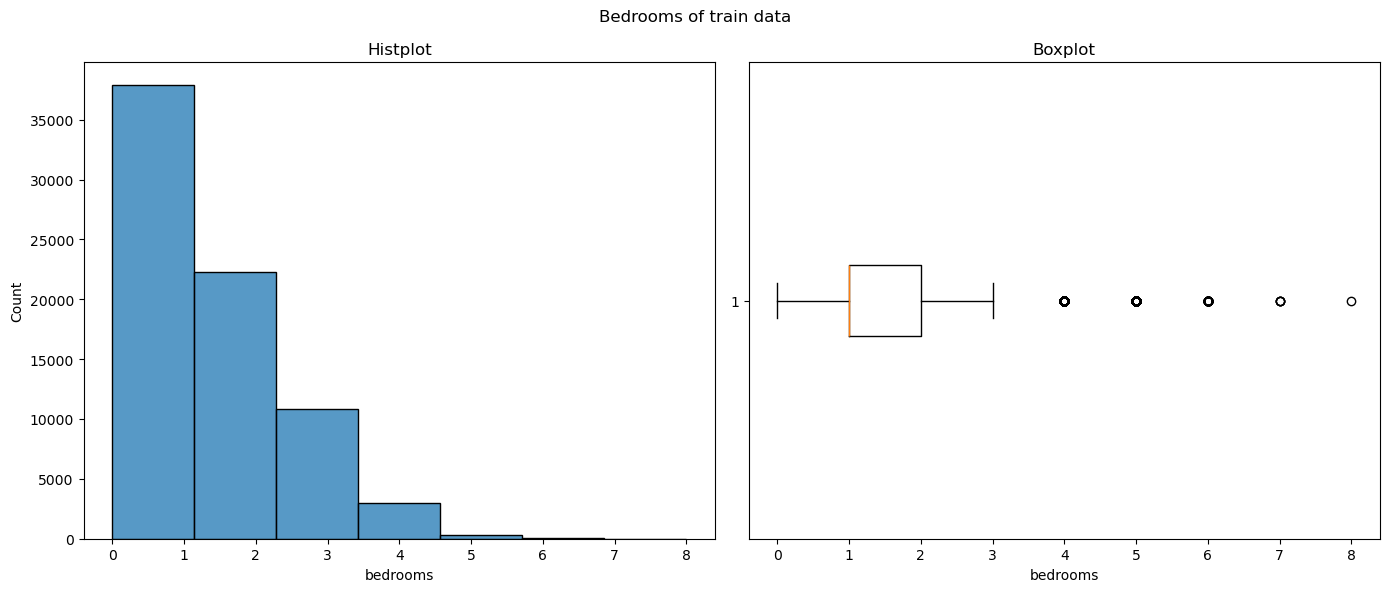

In [115]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=train_data, x='bedrooms', bins=7, ax=ax1)
ax1.set_title('Histplot')

ax2.boxplot(train_data['bedrooms'], vert=False)
ax2.set_title('Boxplot')
ax2.set_xlabel('bedrooms')

plt.suptitle('Bedrooms of train data')
plt.tight_layout()
plt.show()

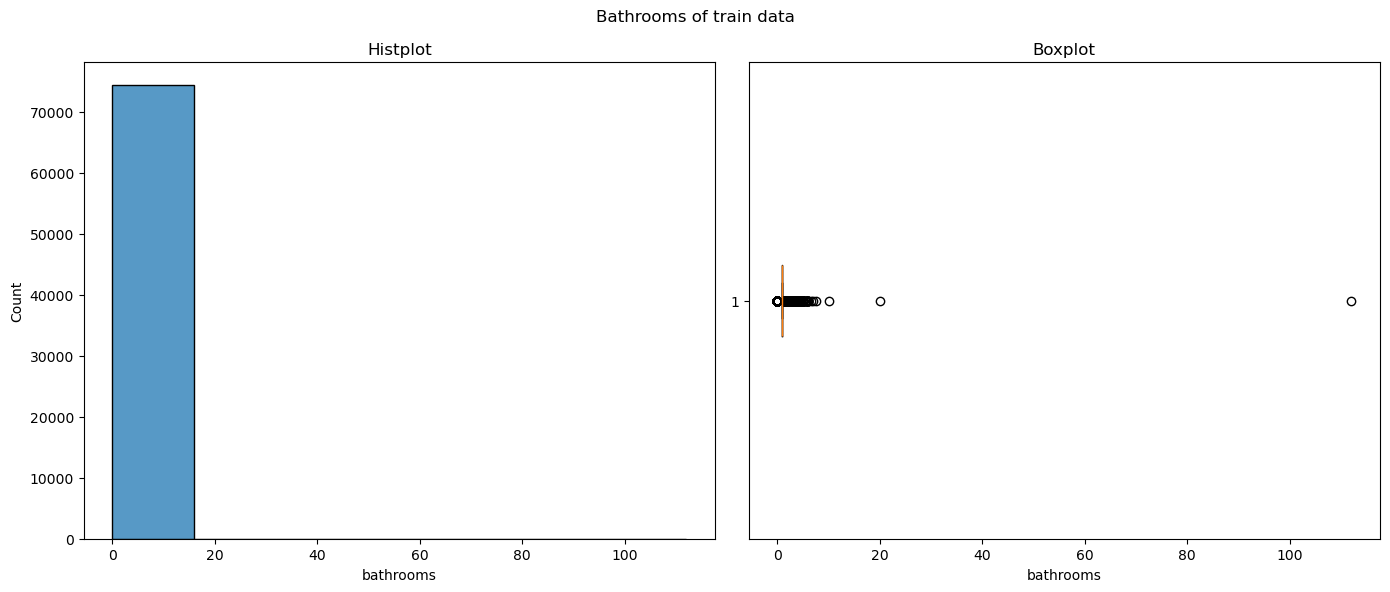

In [116]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=X_train, x='bathrooms', bins=7, ax=ax1)
ax1.set_title('Histplot')

ax2.boxplot(X_train['bathrooms'], vert=False)
ax2.set_title('Boxplot')
ax2.set_xlabel('bathrooms')

plt.suptitle('Bathrooms of train data')
plt.tight_layout()
plt.show()

#### Заметим, что в признаке bathrooms есть выбросы
- #### Обработаем выбросы в train

In [117]:
train_upper_bound = X_train['bathrooms'].quantile(0.99) 
train_lower_bound = X_train['bathrooms'].quantile(0.01)
# Применяем обрезание (замена крайними границами) выборосов
X_train['bathrooms'] = X_train['bathrooms'].clip(train_lower_bound, train_upper_bound)

- #### Применяем тот же алгоритм для test и validation выборок

In [118]:
X_test['bathrooms'] = X_test['bathrooms'].clip(train_lower_bound, train_upper_bound)
X_val['bathrooms'] = X_val['bathrooms'].clip(train_lower_bound, train_upper_bound)

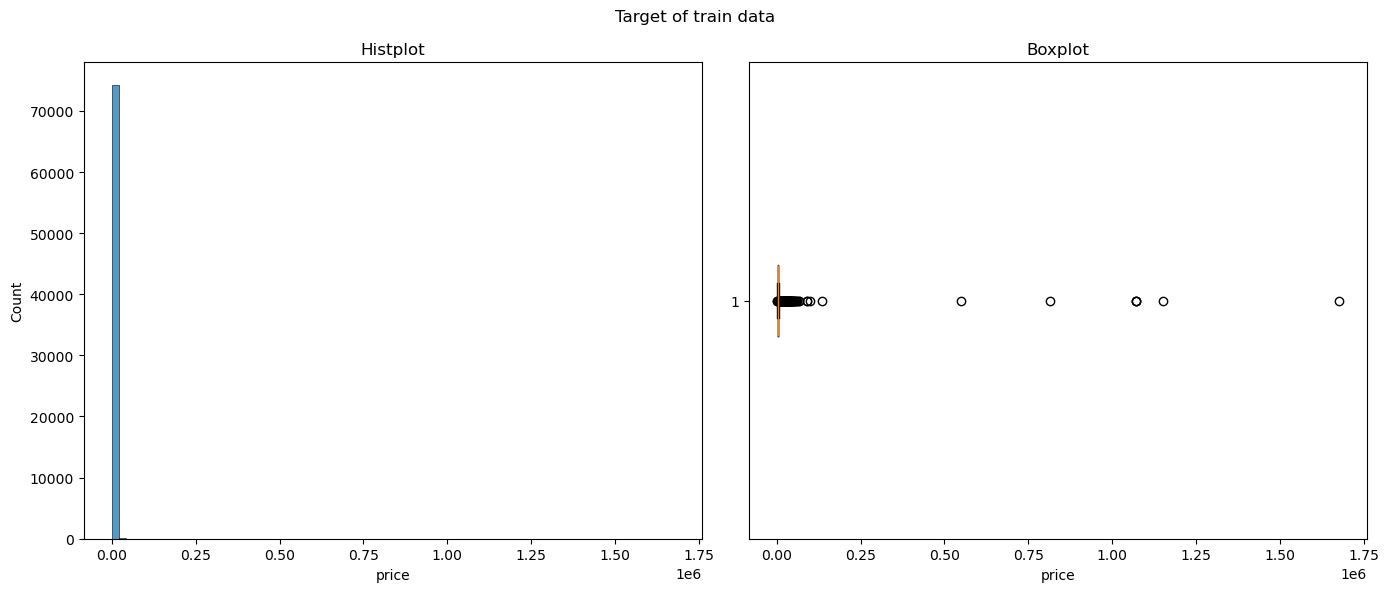

In [119]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(data=train_data, x='price', bins=80, ax=ax1)
ax1.set_title('Histplot')

ax2.boxplot(train_data['price'], vert=False)
ax2.set_title('Boxplot')
ax2.set_xlabel('price')

plt.suptitle('Target of train data')
plt.tight_layout()
plt.show()

In [120]:
lower_bound = train_data['price'].quantile(0.01)
upper_bound = train_data['price'].quantile(0.99)
X_train = train_data[(train_data['price'] >= lower_bound) & (train_data['price'] <= upper_bound)].drop(columns=['price']).reset_index(drop=True)
y_train = train_data['price'][(train_data['price'] >= lower_bound) & (train_data['price'] <= upper_bound)].reset_index(drop=True)

- #### Нормализуем данные

In [121]:
X_train_to_encode = X_train[['bathrooms', 'bedrooms']]
X_train_binary = X_train.drop(columns=['bathrooms', 'bedrooms'])
X_val_to_encode = X_val[['bathrooms', 'bedrooms']]
X_val_binary = X_val.drop(columns=['bathrooms', 'bedrooms'])
X_test_to_encode = X_test[['bathrooms', 'bedrooms']]
X_test_binary = X_test.drop(columns=['bathrooms', 'bedrooms'])

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_encoded = scaler.fit_transform(X_train_to_encode)
X_test_encoded = scaler.transform(X_test_to_encode)
X_val_encoded = scaler.transform(X_val_to_encode)

In [123]:
X_train_encoded = pd.DataFrame(X_train_encoded, columns=['bathrooms', 'bedrooms'])
X_val_encoded = pd.DataFrame(X_val_encoded, columns=['bathrooms', 'bedrooms'])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=['bathrooms', 'bedrooms'])

In [124]:
X_train = pd.concat([X_train_encoded, X_train_binary.reset_index(drop=True)], axis=1)
X_val = pd.concat([X_val_encoded, X_val_binary.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_encoded, X_test_binary.reset_index(drop=True)], axis=1)

- #### Обучим модель на всех признаках

In [125]:
basic_model = Lasso()
basic_model.fit(X_train, y_train)

y_pred = basic_model.predict(X_test)

## 6.1 Обучение модели на топ 10 признаках по коэфицентам модели

- #### Отберем топ 10 влиятельных признаков по коэфицентам обученной модели

In [126]:
coefs = basic_model.coef_
columns = X_train.columns
# Создаем словарь коэфицент: название признака
dict_of_coefs = dict(zip(coefs, columns))
# Сортируем по коэфицентам
sorted_coefs = sorted(dict_of_coefs.items(), key=lambda item: abs(item[0]), reverse=True)
# Отбираем топ 10 самых сильно влияющих признаков
top_10_features = sorted_coefs[:10]
top_10_features_names = [item[1] for item in top_10_features]
top_10_features_names

['Doorman',
 'bedrooms',
 'LaundryInUnit',
 'bathrooms',
 'FitnessCenter',
 'LaundryInBuilding',
 'HighSpeedInternet',
 'Elevator',
 'DiningRoom',
 'NoFee']

In [127]:
top_10_X_train = X_train[top_10_features_names]
top_10_X_test = X_test[top_10_features_names]
top_10_X_train

,Doorman,bedrooms,LaundryInUnit,bathrooms,FitnessCenter,LaundryInBuilding,HighSpeedInternet,Elevator,DiningRoom,NoFee
0,0,-0.490600,0,-0.317838,0,0,0,0,0,0
1,0,0.423758,0,-0.317838,0,0,0,1,1,1
2,1,0.423758,0,1.303371,1,1,1,1,0,0
3,0,-1.404959,0,-0.317838,0,0,0,0,0,0
4,0,-0.490600,1,-0.317838,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72933,0,-0.490600,0,-0.317838,0,0,0,0,0,0
72934,1,0.423758,0,-0.317838,0,1,0,1,0,1
72935,0,-0.490600,1,-0.317838,0,0,0,0,0,1
72936,1,-1.404959,0,-0.317838,1,0,0,1,0,0


- #### Обучим модель только на этих 10 самых влиятельных признаках

In [128]:
top_10_features_model = Lasso()
top_10_features_model.fit(top_10_X_train, y_train)

y_pred_top = top_10_features_model.predict(top_10_X_test)

In [129]:
results = {
    "Model": ['All features Lasso', 'Top 10 features Lasso'],
    "RMSE": [root_mean_squared_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred_top)],
    "MAE": [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_top)],
    "R²": [r2_score(y_test, y_pred), r2_score(y_test, y_pred_top)]
}

df_results = pd.DataFrame(results)
df_results

,Model,RMSE,MAE,R²
0,All features Lasso,1987.716924,873.177411,0.353428
1,Top 10 features Lasso,1990.503145,875.439794,0.351614


**Вывод:** нет особой разницы, обучать модель на всех признаках или на топ-10  

## 6.2 Обучение модели на топ 10 признаках по nan-ratio отбору и корреляции

In [130]:
def top_features_by_nan_cor(data):
    # Удаление признаков, с пропусками больше порога 0.5
    columns_to_drop = [column for column in data.columns if (data[column].isnull().sum() / len(data[column])) > 0.5]
    if len(columns_to_drop) > 0:
        data.drop(columns=columns_to_drop)
    # Вычисление корреляции
    corr_features = data.corr()['price']
    corr_dict = {corr_features[key]: key for key in corr_features.keys() if corr_features[key] != 1}
    top_features = sorted(corr_dict.items(), key=lambda item: abs(item[0]), reverse=True)[:10]
    print(top_features)
    top_features_names = [feature[1] for feature in top_features]
    return top_features_names


In [131]:
columns = top_features_by_nan_cor(data=train_data)
top_10_nan_cor_train = X_train[columns]
top_10_nan_cor_test = X_test[columns]
columns

[(0.10937022981515261, 'bathrooms'), (0.10066898398692342, 'bedrooms'), (0.05519706253441819, 'Doorman'), (0.04857733298683955, 'LaundryInUnit'), (0.04484321087339939, 'DiningRoom'), (0.04015498216626147, 'Elevator'), (0.03438251284857227, 'FitnessCenter'), (0.030239289105677383, 'Terrace'), (0.030215549210479163, 'Dishwasher'), (0.02704584872650937, 'OutdoorSpace')]


['bathrooms',
 'bedrooms',
 'Doorman',
 'LaundryInUnit',
 'DiningRoom',
 'Elevator',
 'FitnessCenter',
 'Terrace',
 'Dishwasher',
 'OutdoorSpace']

In [132]:
top_10_features_nan_cor_model = Lasso()
top_10_features_nan_cor_model.fit(top_10_nan_cor_train, y_train)

y_pred_top_nan_cor = top_10_features_nan_cor_model.predict(top_10_nan_cor_test)
df_results.loc[2] = ['Top 10 features nan-ratio and corr Lasso', root_mean_squared_error(y_test, y_pred_top_nan_cor),
                  mean_absolute_error(y_test, y_pred_top_nan_cor), r2_score(y_test, y_pred_top_nan_cor)]
df_results

,Model,RMSE,MAE,R²
0,All features Lasso,1987.716924,873.177411,0.353428
1,Top 10 features Lasso,1990.503145,875.439794,0.351614
2,Top 10 features nan-ratio and corr Lasso,2004.205904,886.256236,0.342656


**Вывод:** нет особой разницы, обучать модель на всех признаках, на топ-10 по коэффицентам или на топ-10 по кореляции

## 6.3 Обучение модели на признаках, отобранных с помощью перестановочной важности

In [133]:
from sklearn.inspection import permutation_importance
result = permutation_importance(basic_model, X_val, y_val, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
features = dict(zip(-result.importances_mean, X_val.columns))
top_features = sorted(features.items(), key=lambda item: abs(item[0]), reverse=True)[:10]
top_features_names = [feature[1] for feature in top_features]
top_features_names


['bedrooms',
 'bathrooms',
 'Doorman',
 'LaundryInUnit',
 'LaundryInBuilding',
 'FitnessCenter',
 'Elevator',
 'NoFee',
 'HardwoodFloors',
 'HighSpeedInternet']

In [134]:
per_imp_model = Lasso()
per_imp_model.fit(X_train[top_features_names], y_train)
y_pred_per_imp = per_imp_model.predict(X_test[top_features_names])
df_results.loc[3] = ['Top 10 features by permutation importance Lasso', root_mean_squared_error(y_test, y_pred_per_imp),
                  mean_absolute_error(y_test, y_pred_per_imp), r2_score(y_test, y_pred_per_imp)]
df_results

,Model,RMSE,MAE,R²
0,All features Lasso,1987.716924,873.177411,0.353428
1,Top 10 features Lasso,1990.503145,875.439794,0.351614
2,Top 10 features nan-ratio and corr Lasso,2004.205904,886.256236,0.342656
3,Top 10 features by permutation importance Lasso,1991.756323,874.281174,0.350797


## 6.4 Обучение модели на то 10 признаков по Shap

In [135]:
import shap
explainer = shap.LinearExplainer(basic_model, X_train)
shap_values = explainer.shap_values(X_test)
aver_shap_values = shap_values.mean(axis=0)
aver_shap_values

array([ 1.87605602e+01,  7.94187620e+01, -4.68080202e+00, -1.73004861e-01,
       -4.47215980e-01,  4.20591786e+00, -7.86549316e+01,  2.76084020e+00,
        5.98813431e+00,  1.21040988e+00, -2.21176903e+01, -1.19714068e+01,
        6.59771938e-02, -4.41490674e-01,  0.00000000e+00, -5.68822989e+00,
        1.27973895e+00,  0.00000000e+00,  5.39317279e-01,  6.71067832e-01,
        4.49511600e+00,  2.95578756e-01])

In [136]:
columns = X_train.columns
importance_dict = {aver_shap_values[i]: columns[i] for i in range(len(aver_shap_values))}
top_features = sorted(importance_dict.items(), key=lambda item: abs(item[0]), reverse=True)[:10]
top_features_names = [j for i, j in top_features]
top_features_names

['bedrooms',
 'Doorman',
 'FitnessCenter',
 'bathrooms',
 'LaundryInUnit',
 'LaundryInBuilding',
 'DiningRoom',
 'Elevator',
 'Terrace',
 'DogsAllowed']

In [137]:
print(f"SHAP values shape: {shap_values.shape}")

SHAP values shape: (24802, 22)


C:\Users\Алёна\AppData\Local\Temp\ipykernel_13984\3237810805.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


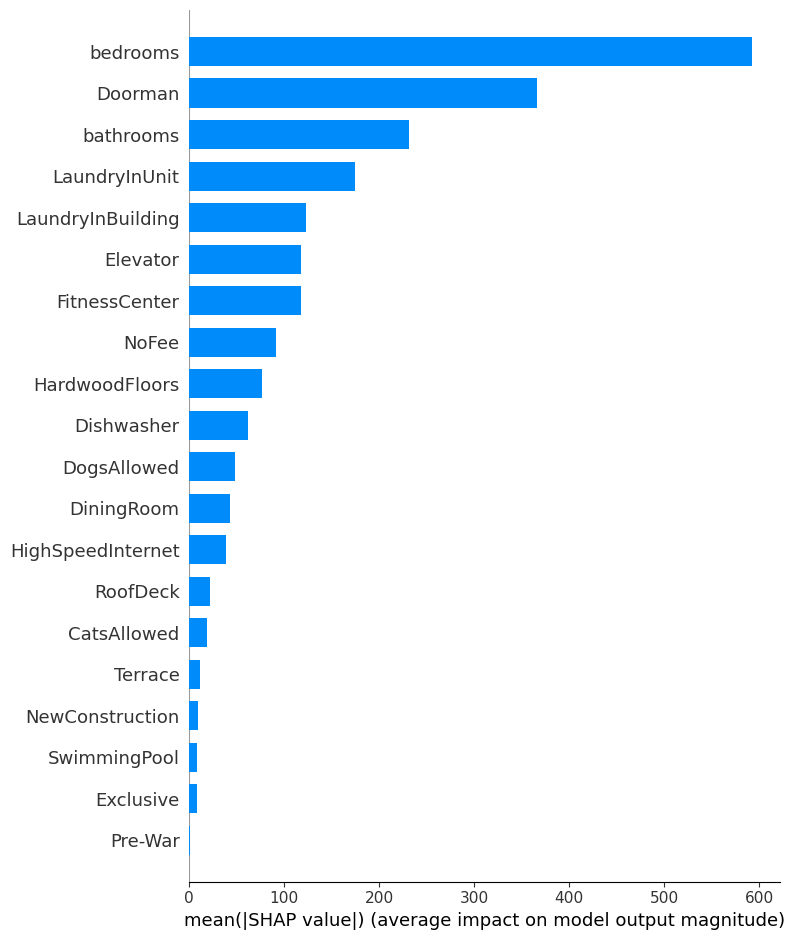

In [138]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

C:\Users\Алёна\AppData\Local\Temp\ipykernel_13984\2940161786.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


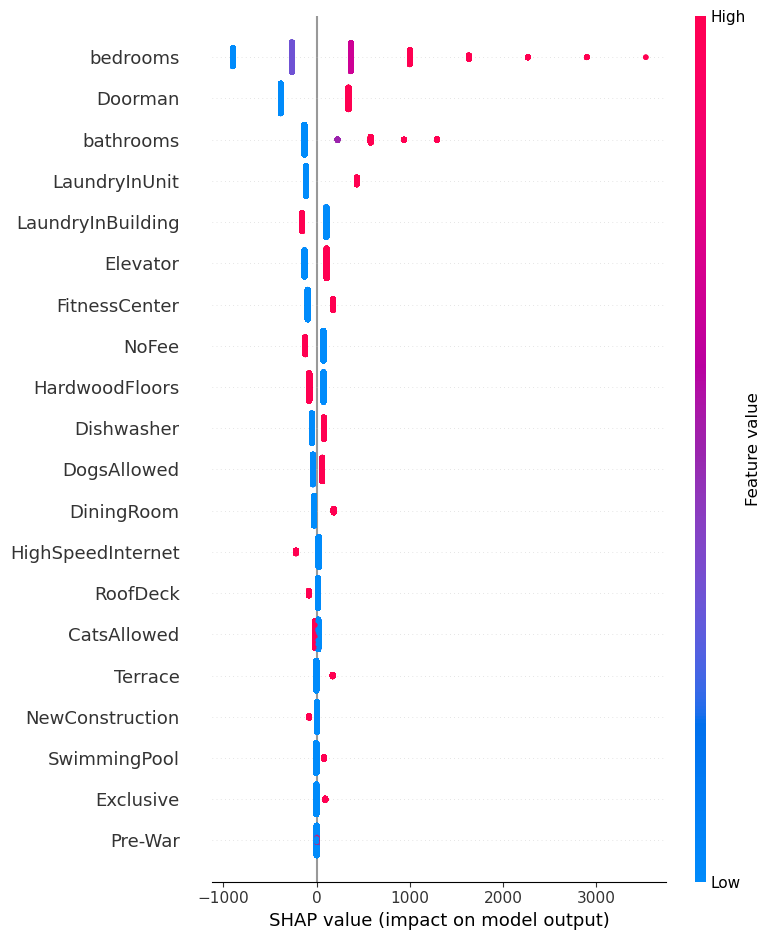

In [139]:
shap.summary_plot(shap_values, X_test)

In [140]:
shap_model = Lasso()
shap_model.fit(X_train[top_features_names], y_train)
y_pred_shap = shap_model.predict(X_test[top_features_names])
df_results.loc[4] = ['Top 10 features by SHAP Lasso', root_mean_squared_error(y_test, y_pred_shap),
                  mean_absolute_error(y_test, y_pred_shap), r2_score(y_test, y_pred_shap)]


- ### Сравнение результатов

In [141]:
df_results

,Model,RMSE,MAE,R²
0,All features Lasso,1987.716924,873.177411,0.353428
1,Top 10 features Lasso,1990.503145,875.439794,0.351614
2,Top 10 features nan-ratio and corr Lasso,2004.205904,886.256236,0.342656
3,Top 10 features by permutation importance Lasso,1991.756323,874.281174,0.350797
4,Top 10 features by SHAP Lasso,1996.994425,878.921225,0.347378


# 7. Оптимизация гиперпараметров

## 7.1 Grid Search

In [142]:
def my_grid_search(X_train, y_train, X_val, y_val, params_grid):
    best_model = None
    best_score = float('inf')
    best_params = None
    alphas = params_grid['alpha']
    l1_ratios = params_grid['l1_ratio']
    results = []
    for alpha in alphas:
        for l1_ratio in l1_ratios:
            # Перебираем все возможные комбинации alpha и l1_ratio
            model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            score = mean_absolute_error(y_val, y_pred)
            
            results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'mse': score})

            if score < best_score:
                best_score = score
                best_params = {'alpha': alpha, 'l1_ratio': l1_ratio}
                best_model = model

    return best_params, best_score, best_model, results

## 7.2 Random Search

In [143]:
def my_random_search(X_train, y_train, X_val, y_val, param_distributions, n_iter=20):
    best_model = None
    best_score = float('inf')
    best_params = None
    results = []

    for i in range(n_iter):
        # Выбираем случайные параметры
        alpha = random.choice(param_distributions['alpha'])
        l1_ratio = random.choice(param_distributions['l1_ratio'])
    
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        model.fit(X_train, y_train)
       
        y_pred = model.predict(X_val)
        score = mean_absolute_error(y_val, y_pred)

        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'mse': score})
        
        if score < best_score:
            best_score = score
            best_params = {'alpha': alpha, 'l1_ratio': l1_ratio}
            best_model = model

    return best_params, best_score, best_model, results

In [144]:
small_sample_of_params = {'alpha': [0.001, 0.05, 0.1, 0.5, 1.0, 5, 10],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
big_sample_of_params = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10, 100],
    'l1_ratio': [0.001, 0.005, 0.05, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1.0]}
best_params_gs, best_score_gs, best_model_gs, result_gs = my_grid_search(X_train, y_train, X_val, y_val, small_sample_of_params)

best_params_rs, best_score_rs, best_model_rs, result_rs = my_random_search(X_train, y_train, X_val, y_val, big_sample_of_params, n_iter=40)

In [145]:
print(f'Best parametrs of Grig Search: {best_params_gs}\nBest parametrs of Random Search:{best_params_rs}')
print(f'Best MAE of Grid Search: {best_score_rs}\nBest MAE of Random Search: {best_score_rs}')

Best parametrs of Grig Search: {'alpha': 0.1, 'l1_ratio': 0.7}
Best parametrs of Random Search:{'alpha': 0.1, 'l1_ratio': 0.65}
Best MAE of Grid Search: 1129.3087718811971
Best MAE of Random Search: 1129.3087718811971


**Вывод:** Random Search обрабатывает быстрее большее количество различных комбинаций параметров, чем Grid Search

In [146]:
best_model = best_model_rs
y_pred = best_model.predict(X_test)
df_results.loc[5] = ['Best model with hyperparameter opt ElasticNet', root_mean_squared_error(y_test, y_pred),
                  mean_absolute_error(y_val, y_pred), r2_score(y_test, y_pred)]
df_results

,Model,RMSE,MAE,R²
0,All features Lasso,1987.716924,873.177411,0.353428
1,Top 10 features Lasso,1990.503145,875.439794,0.351614
2,Top 10 features nan-ratio and corr Lasso,2004.205904,886.256236,0.342656
3,Top 10 features by permutation importance Lasso,1991.756323,874.281174,0.350797
4,Top 10 features by SHAP Lasso,1996.994425,878.921225,0.347378
5,Best model with hyperparameter opt ElasticNet,1997.581637,1820.216025,0.346994


## 7.3 Optuna

In [147]:
import optuna
from sklearn.model_selection import cross_val_score
def objective_function(trial):
    """
    Функция принимает объект trial в качестве аргумента и возвращает числовое значение метрики,
    которую нужно максимизировать или минимизировать. Optuna автоматически вызывает эту функцию,
    передавая ей различные комбинации гиперпараметров для поиска оптимального решения.
    """
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True) # В логарифмированной шкале
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0) # l1_ratio может быть только в интервале [0,1]
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    score = cross_val_score(model, X_train, y_train, 
                           cv=5, 
                           scoring='neg_mean_absolute_error'
                           ).mean()
    
    # Возвращаем положительное MAE (минимизируем)
    return -score

In [148]:
study = optuna.create_study(direction='minimize')

# Запускаем оптимизацию на 100 trials (испытаний)
study.optimize(objective_function, n_trials=100)
print("Лучшие параметры:", study.best_params)
# Лучшее значение целевой функции
print("Лучшее MAE:", study.best_value)
# Номер trial, который показал лучший результат
print("Лучший trial:", study.best_trial.number)

[I 2025-09-12 19:55:20,207] A new study created in memory with name: no-name-7eb97ade-d0c6-4581-967f-167994e65610
[I 2025-09-12 19:55:20,481] Trial 0 finished with value: 757.8912154601056 and parameters: {'alpha': 0.5997288769690304, 'l1_ratio': 0.7314321492270045}. Best is trial 0 with value: 757.8912154601056.
[I 2025-09-12 19:55:21,975] Trial 1 finished with value: 749.4475953879114 and parameters: {'alpha': 0.0028192833396394035, 'l1_ratio': 0.3503860122458009}. Best is trial 1 with value: 749.4475953879114.
[I 2025-09-12 19:55:22,187] Trial 2 finished with value: 836.2029608694081 and parameters: {'alpha': 3.2001550508776067, 'l1_ratio': 0.759756736181361}. Best is trial 1 with value: 749.4475953879114.
[I 2025-09-12 19:55:23,331] Trial 3 finished with value: 748.9851344243477 and parameters: {'alpha': 0.010957346809939329, 'l1_ratio': 0.6767565958921464}. Best is trial 3 with value: 748.9851344243477.
[I 2025-09-12 19:55:23,638] Trial 4 finished with value: 777.3658183140075 and

Лучшие параметры: {'alpha': 0.035357855728639725, 'l1_ratio': 0.003115527029366183}
Лучшее MAE: 745.4125450729183
Лучший trial: 48


In [149]:
optuna_model = ElasticNet(alpha=study.best_params['alpha'], l1_ratio=study.best_params['l1_ratio'])
optuna_model.fit(X_train, y_train)
y_pred = optuna_model.predict(X_test)
df_results.loc[6] = ['Model with optuna hyperparameter opt ElasticNet', root_mean_squared_error(y_test, y_pred),
                  mean_absolute_error(y_val, y_pred), r2_score(y_test, y_pred)]
df_results

,Model,RMSE,MAE,R²
0,All features Lasso,1987.716924,873.177411,0.353428
1,Top 10 features Lasso,1990.503145,875.439794,0.351614
2,Top 10 features nan-ratio and corr Lasso,2004.205904,886.256236,0.342656
3,Top 10 features by permutation importance Lasso,1991.756323,874.281174,0.350797
4,Top 10 features by SHAP Lasso,1996.994425,878.921225,0.347378
5,Best model with hyperparameter opt ElasticNet,1997.581637,1820.216025,0.346994
6,Model with optuna hyperparameter opt ElasticNet,1997.599147,1820.160061,0.346983
